0.904854810335


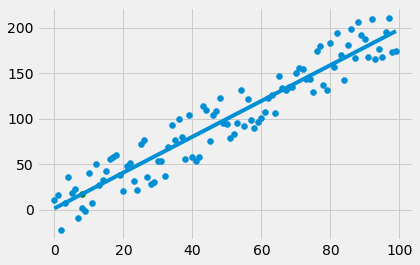

In [4]:
import random
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

# y = mx + b
# m -> best fit slope
# b -> y intercept


def create_data_set(quantity, variance, step=2, correlation='pos'):
    value = 1
    ys = []
    xs = [i for i in range(quantity)]

    for i in range(quantity):
        y = value + random.randrange(-variance, variance)
        ys.append(y)

        if correlation == 'pos':
            value += step
        elif correlation == 'neg':
            value -= step

    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


def best_fit_slope_and_intercept(xs, ys):
    m = (
        ((mean(xs) * mean(ys)) - mean(xs * ys)) /
        (mean(xs) ** 2 - mean(xs ** 2))
    )

    b = mean(ys) - m * mean(xs)

    return m, b


def squared_error(ys_original, ys_line):
    return sum((ys_line - ys_original) ** 2)


def coefficient_of_determination(ys_original, ys_line):
    y_mean_line = [mean(ys_original) for _ in ys_original]
    squared_error_regression = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)

    return 1 - (squared_error_regression / squared_error_y_mean)


xs, ys = create_data_set(100, 30)

m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [m * x + b for x in xs]

predict_x = 8
predict_y = m * predict_x + b

# How accurate the best fit line is
coefficient_of_determination = coefficient_of_determination(ys, regression_line)
print(coefficient_of_determination)

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()
